# Project Name - gender classification system


Project Type - EDA/Classification

Contribution - Individual
 member-nikita sharma

# Project problem statement

Deploy a classification model to categorize a user's gender.

#**GitHub Link -**

#Let's Begin !

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the flight data from the CSV file
flight_path = "flights.csv"
flight = pd.read_csv(flight_path)

# Load the hotel data from the CSV file
hotel_path = "hotels.csv"
hotel = pd.read_csv(hotel_path)

# Load the users data from the CSV file
users_path = "users.csv"
users = pd.read_csv(users_path)

In [ ]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [ ]:
users.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [ ]:
users['gender'].value_counts()

gender
male      452
female    448
none      440
Name: count, dtype: int64

In [ ]:
users=users[(users['gender']=='male') | (users['gender']=='female') ]

In [ ]:
# Encoding userCode and company to numeric values
label_encoder = LabelEncoder()

users['company_encoded'] = label_encoder.fit_transform(users['company'])
users['gender_encoded'] = label_encoder.fit_transform(users['gender'])

users.head()

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0


In [ ]:
# prompt: Initialize the SentenceTransformer model

model = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
# Encode text-based columns and create embeddings

text_columns = ['name']

for column in text_columns:
    users[column + '_embedding'] = users[column].apply(lambda text: model.encode(text))



In [ ]:
text_embeddings = users[text_columns].values.tolist()

In [ ]:
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
text_columns = ['name']


In [ ]:
# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(users), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

numerical_features=['code','company_encoded','age']


X_numerical = users[numerical_features].values

In [ ]:
# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))

y = users['gender_encoded']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic regression

In [ ]:
# Initialize a Logistic Regression Classifier

logistic_model = LogisticRegression(random_state=42)


In [ ]:
# Fit the model to the training data

logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:

# Predict the gender of users in the test set
y_pred_logistic = logistic_model.predict(X_test)

# Print the predicted gender values
print(y_pred_logistic)


[1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


In [ ]:
# Calculate and print accuracy

from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logistic)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.9708333333333333
Validation Accuracy: 0.9666666666666667
The model is overfitting.


# Decision Tree Classifier

In [ ]:
# Initialize a Random Forest Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", report)




Accuracy: 0.5055555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.38      0.39        77
           1       0.56      0.60      0.58       103

    accuracy                           0.51       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.50      0.51      0.50       180



In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9555555555555556
The model is overfitting.


# Random Forest Classifier

In [ ]:


# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)




Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        77
           1       0.94      0.99      0.96       103

    accuracy                           0.96       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9833333333333333
The model is overfitting.


# Gradient Boosting Classifier

In [ ]:

# Initialize a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = gb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_gb)
print("\nClassification Report:\n", report)




Accuracy: 0.5722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.54        77
           1       0.65      0.55      0.60       103

    accuracy                           0.57       180
   macro avg       0.57      0.58      0.57       180
weighted avg       0.58      0.57      0.57       180



In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = gb_classifier.predict(X_train)
y_val_pred = gb_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 1.0
Validation Accuracy: 0.9666666666666667
The model is overfitting.


# ROC-AUC Curve

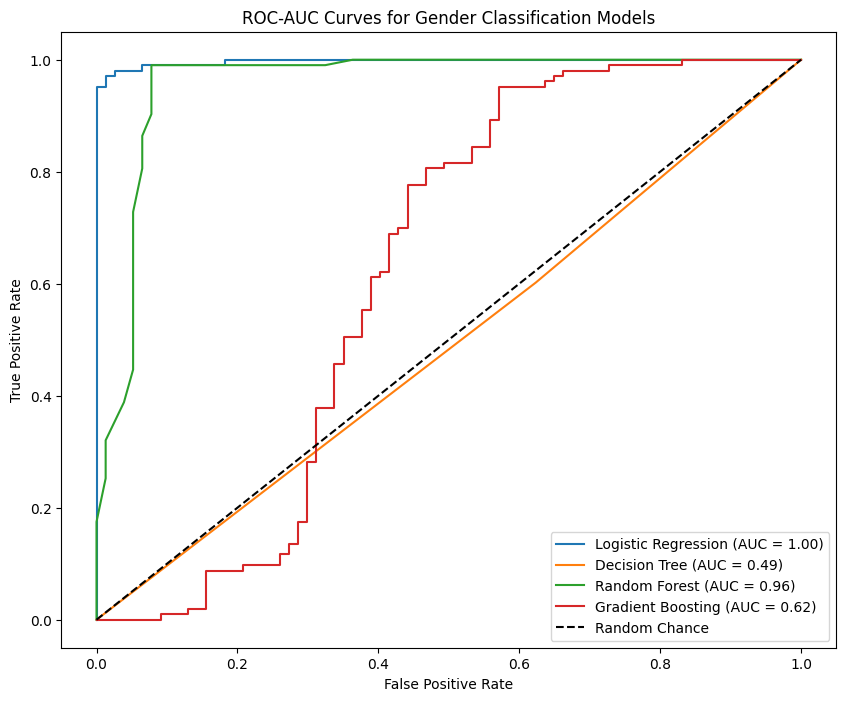

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Random Forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Gradient Boosting
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, label="Logistic Regression (AUC = %0.2f)" % logistic_auc)
plt.plot(dt_fpr, dt_tpr, label="Decision Tree (AUC = %0.2f)" % dt_auc)
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = %0.2f)" % rf_auc)
plt.plot(gb_fpr, gb_tpr, label="Gradient Boosting (AUC = %0.2f)" % gb_auc)

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Gender Classification Models")
plt.legend()
plt.show()


# Model selection and Hyperparameter Tuning


In [ ]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Logistic Regression model with the best hyperparameters
logistic_model_tuned = LogisticRegression(**best_params)
logistic_model_tuned.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_tuned = logistic_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Accuracy of tuned Logistic Regression model:", accuracy_tuned)



Accuracy of tuned Logistic Regression model: 0.9611111111111111


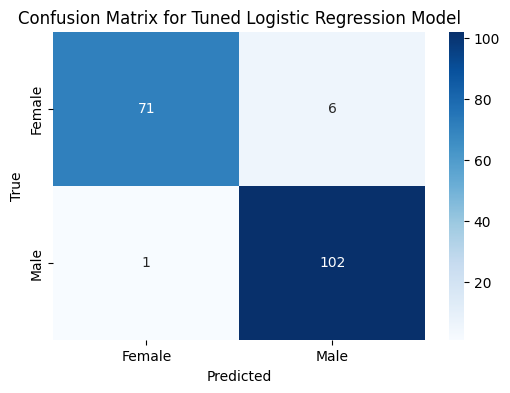

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the gender of users in the test set using the tuned model
y_pred_tuned = logistic_model_tuned.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Define labels for the confusion matrix
labels = ['Female', 'Male']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Tuned Logistic Regression Model")
plt.show()


# Pickle the models

In [ ]:

import pickle

# Save the tuned Logistic Regression model
with open('logistic_model_tuned.pkl', 'wb') as f:
    pickle.dump(logistic_model_tuned, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the PCA model
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
